<a href="https://colab.research.google.com/github/ptoledoc7/Prueba/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio Regresiones

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

## Cargar Datos

In [9]:
df = pd.read_csv('indicadores.csv')
df

,Fecha,X1,X2,X3,X4,X5,Y
0,31/12/2019,3483564.75,9.52,4.05,797.63,28.00,33510.82
1,31/01/2020,3401962.60,9.28,3.82,770.41,27.33,40278.99
2,29/02/2020,3399839.30,9.27,3.86,757.46,27.65,65831.81
3,31/03/2020,3405730.90,9.27,3.81,758.00,30.57,83075.07
4,30/04/2020,3398139.72,9.24,3.89,763.55,30.88,43204.51
5,31/05/2020,3419279.85,9.28,4.07,774.54,30.19,37730.61
6,30/06/2020,3420337.51,9.27,4.08,772.75,30.94,32549.02
7,31/07/2020,3421997.55,9.26,4.07,780.21,31.40,31564.83
8,31/08/2020,3426972.76,9.25,4.04,821.70,30.94,33103.29
9,30/09/2020,3433862.54,9.26,4.12,842.32,30.68,28293.05


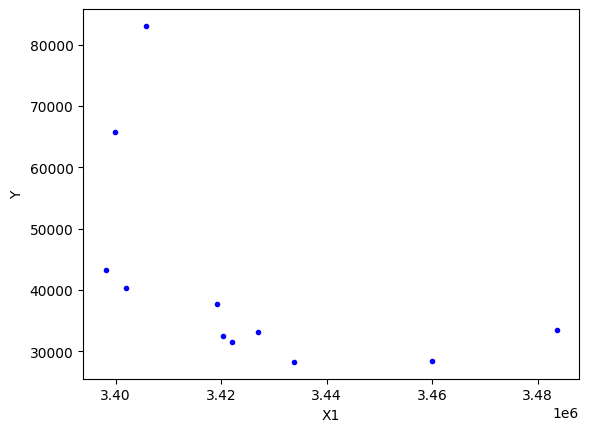

In [10]:
plt.plot(df['X1'], df['Y'], 'b.')
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()

## Correlacion

In [11]:
df[['X1','X2','X3','X4','X5','Y']].corr()

,X1,X2,X3,X4,X5,Y
X1,1.000000,0.799626,0.678814,0.613606,-0.023364,-0.521182
X2,0.799626,1.000000,0.193387,0.139428,-0.470137,-0.166645
X3,0.678814,0.193387,1.000000,0.714157,0.484717,-0.793466
X4,0.613606,0.139428,0.714157,1.000000,0.279824,-0.644359
X5,-0.023364,-0.470137,0.484717,0.279824,1.000000,-0.237321
Y,-0.521182,-0.166645,-0.793466,-0.644359,-0.237321,1.000000


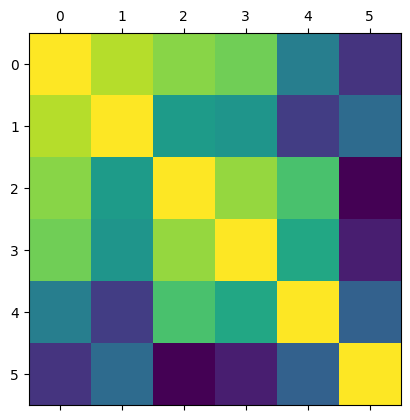

In [12]:
plt.matshow(df[['X1','X2','X3','X4','X5','Y']].corr())
plt.show()

## Regresion Lineal

In [13]:
var = 'X3'
X = df[var].values.reshape(-1, 1)
y = df['Y']
x_l = np.linspace(min(df[var]), max(df[var])).reshape(-1, 1)

In [14]:
rl = LinearRegression()
rl.fit(X, y)

LinearRegression()

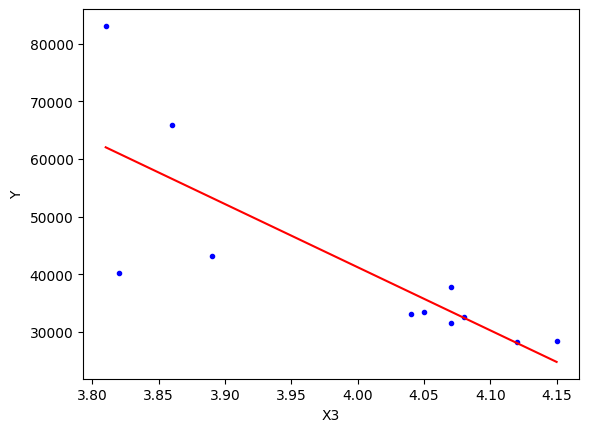

In [15]:
plt.plot(X, y, 'b.')

y_ = rl.predict(x_l)
plt.plot(x_l, y_, 'r-')

plt.xlabel(var)
plt.ylabel('Y')
plt.show()

## Metrica

In [16]:
r2 = np.around(rl.score(X, y), decimals=2)

print(f'R2 {var} = {r2}')

R2 X3 = 0.63


## Regresion Polinomial

In [17]:
X = df['X3'].values.reshape(-1, 1)
y = df['Y']

x_l = np.linspace(min(df['X3']), max(df['X3'])).reshape(-1, 1)

In [18]:
def PlotRegression (grados, grupo):
    pol = PolynomialFeatures(degree=grados)
    X_ = pol.fit_transform(X)

    rl = LinearRegression()
    rl.fit(X_, y)

    r2 = np.around(rl.score(X_, y), decimals=2)

    xl_ = pol.fit_transform(x_l)
    yl_ = rl.predict(xl_)

    plt.subplot(grupo[grados])
    plt.plot(x_l, yl_, "r-")
    plt.plot(X, y, "b.")
    plt.title("Grado " + str(grados) + ": R2 = " + str(r2))

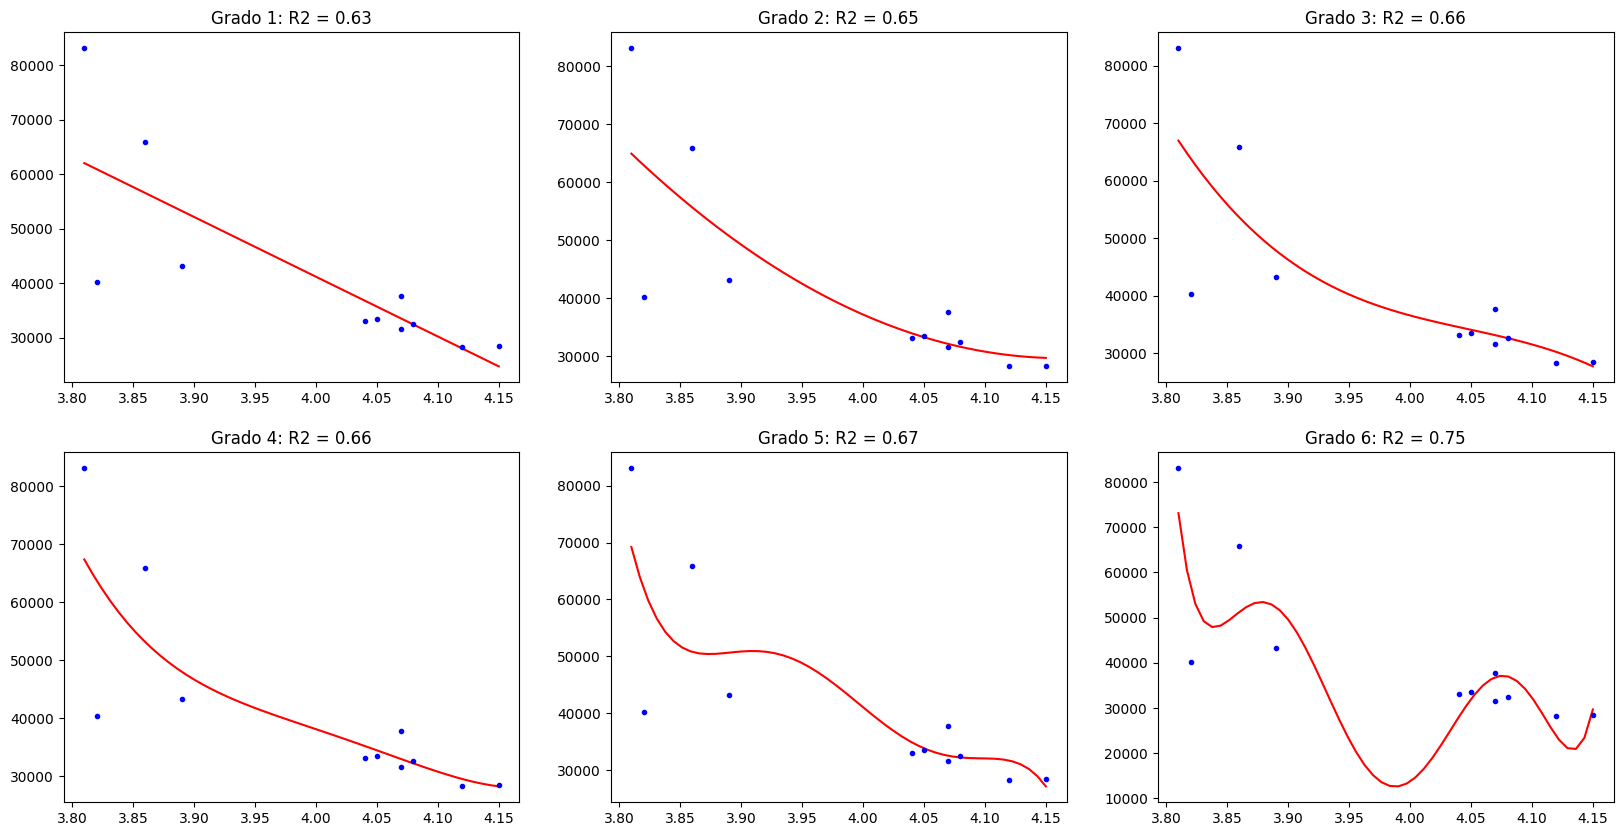

In [19]:
plt.figure(figsize = (20,10))
gp = {1:231, 2:232, 3:233, 4:234, 5:235, 6:236}

for num in range (1, 7):
    PlotRegression(num, gp)

## Outliers

In [20]:
df_ = df.drop([1, 3], axis=0)
df_

,Fecha,X1,X2,X3,X4,X5,Y
0,31/12/2019,3483564.75,9.52,4.05,797.63,28.00,33510.82
2,29/02/2020,3399839.30,9.27,3.86,757.46,27.65,65831.81
4,30/04/2020,3398139.72,9.24,3.89,763.55,30.88,43204.51
5,31/05/2020,3419279.85,9.28,4.07,774.54,30.19,37730.61
6,30/06/2020,3420337.51,9.27,4.08,772.75,30.94,32549.02
7,31/07/2020,3421997.55,9.26,4.07,780.21,31.40,31564.83
8,31/08/2020,3426972.76,9.25,4.04,821.70,30.94,33103.29
9,30/09/2020,3433862.54,9.26,4.12,842.32,30.68,28293.05
10,31/10/2020,3460051.45,9.31,4.15,815.38,30.68,28414.63


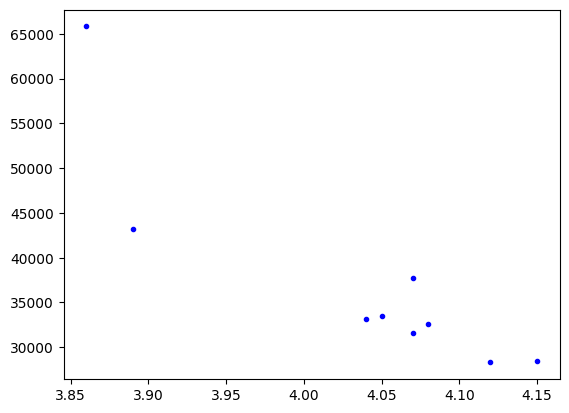

In [21]:
plt.plot(df_['X3'], df_['Y'], 'b.')
plt.show()

In [22]:
X = df_['X3'].values.reshape(-1, 1)
y = df_['Y']

x_l = np.linspace(min(df_['X3']), max(df_['X3'])).reshape(-1, 1)

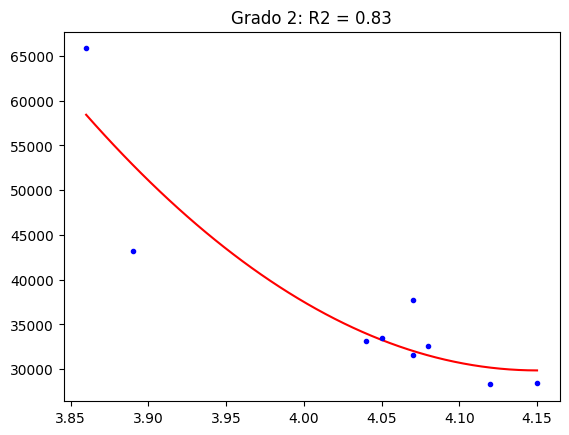

In [23]:
grado = 2

pol = PolynomialFeatures(degree=grado)
x_ = pol.fit_transform(X)

rl = LinearRegression()
rl.fit(x_, y)
r2 = np.around(rl.score(x_, y), decimals=2)

xl_ = pol.fit_transform(x_l)
yl_ = rl.predict(xl_)

y_ = rl.predict(x_)

plt.plot(x_l, yl_, 'r-')
plt.plot(X, y, 'b.')
plt.title(f'Grado {grado}: R2 = ' + str(r2))
plt.show()

## Regresion Lineal Multiple

###  Seleccion de Rasgos

La Eliminacion de Caracteristicas Recursivas (RFE) evalua el conjunto inicial de caracteristicas asignando ponderaciones (coeficientes de un modelo lineal) y la importancia de cada una eliminando las menos relevantes, este procedimiento se repite de forma recursiva hasta alcanzar el numero deseado de caracteristicas para seleccionar.

In [24]:
X = df[['X1','X2','X3','X4','X5']]
y = df['Y']

In [30]:
estimator = SVR(kernel='linear')

selector = RFE(estimator,
               n_features_to_select=3)
selector = selector.fit(X, y)

In [31]:
selector.support_, selector.ranking_

(array([ True, False, False,  True,  True]), array([1, 3, 2, 1, 1]))

In [32]:
X = df[['X1','X4','X5']]

rl = LinearRegression()
rl.fit(X, y)

LinearRegression()

In [33]:
y_ = rl.predict(X[['X1','X4','X5']])

r2 = str(np.around(rl.score(X, y), decimals=2))
print ('R2 = ' + str(r2))

R2 = 0.45


### Multicolinealidad

Es una condicion que ocurre cuando algunas variables predictoras incluidas en el modelo estan correlacionadas con otras variables predictoras, la multicolinealidad severa es problematica, porque puede incrementar la varianza de los coeficientes de regresion, haciendolos inestables.

### Factor de Inflacion de la Varianza

Proporciona un índice que mide hasta qué punto la varianza (el cuadrado de la desviación estándar) de un coeficiente de regresión se incrementa a causa de la colinealidad

- VIF = 1 / (1 - R2)
- VIF = 1 : Las variables no están correlacionadas
- VIF \< 5 : Las variables tienen una correlación moderada y se pueden quedar en el modelo
- VIF \>5 : Las variables están altamente correlacionadas y deben desaparecer del modelo

In [34]:
mcl = smf.ols(formula="X1~X4+Y", data=df).fit()
VIF = 1 / (1 - mcl.rsquared)
VIF

1.676652676440737

In [35]:
mcl = smf.ols(formula="X4~X5+Y", data=df).fit()
VIF = 1 / (1 - mcl.rsquared)
VIF

1.761382019088512

In [36]:
mcl = smf.ols(formula="X1~X5+Y", data=df).fit()
VIF = 1 / (1 - mcl.rsquared)
VIF

1.4175256684853603

### Modelo Multiple sin Outliers

In [37]:
X = df_[['X1','X4','X5']]
y = df_['Y']

In [39]:
rl = LinearRegression()
rl.fit(X, y)

LinearRegression()

In [40]:
y_ = rl.predict(X[['X1','X4','X5']])

r2 = str(np.around(rl.score(X, y), decimals=3))
print ("R2 = " + str(r2))

R2 = 0.953


## Entrenamiento del Modelo

In [41]:
X = df_[['X1','X4','X5']]
y = df_['Y']

In [42]:
rl = LinearRegression()
rl.fit(X, y)

LinearRegression()

In [43]:
print(rl.intercept_)

1300570.9182847494


In [44]:
list(zip(['X1','X4','X5'], rl.coef_))

[('X1', -0.30322073636072144),
 ('X4', -23.67097502509027),
 ('X5', -6794.106105642331)]

### Ecuacion del Modelo:

Y = 1300570.92 + (X1 * -0.30) + (X4 * -23.67) + (X5 * -6794.10)

## Validacion del Modelo

### Raiz del Error Cuadratico Medio

Es la raiz cuadra del MSE, siendo una medida de uso frecuente para determinar las diferencias entre los valores predichos por un modelo y los valores observados.

In [45]:
y_ = rl.predict(df_[['X1','X4','X5']])

rmse = np.around(math.sqrt(mean_squared_error(y, y_)), decimals=2)

print ('RMSE = ' + str(rmse))

RMSE = 2391.73


### Prediccion de Informacion

In [46]:
df_['PRED'] = rl.predict(df_[['X1','X4','X5']])
df_

,Fecha,X1,X2,X3,X4,X5,Y,PRED
0,31/12/2019,3483564.75,9.52,4.05,797.63,28.00,33510.82,35166.198862
2,29/02/2020,3399839.30,9.27,3.86,757.46,27.65,65831.81,63882.291667
4,30/04/2020,3398139.72,9.24,3.89,763.55,30.88,43204.51,42308.520607
5,31/05/2020,3419279.85,9.28,4.07,774.54,30.19,37730.61,40326.184019
6,30/06/2020,3420337.51,9.27,4.08,772.75,30.94,32549.02,34952.271041
7,31/07/2020,3421997.55,9.26,4.07,780.21,31.40,31564.83,31147.038208
8,31/08/2020,3426972.76,9.25,4.04,821.70,30.94,33103.29,31781.631423
9,30/09/2020,3433862.54,9.26,4.12,842.32,30.68,28293.05,30970.879340
10,31/10/2020,3460051.45,9.31,4.15,815.38,30.68,28414.63,23667.554833


In [47]:
pred = rl.predict([[450381.27, 84.45, 30.22]])

print ("Y (Nov-2020) = " + str(pred))

Y (Nov-2020) = [956689.07759889]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


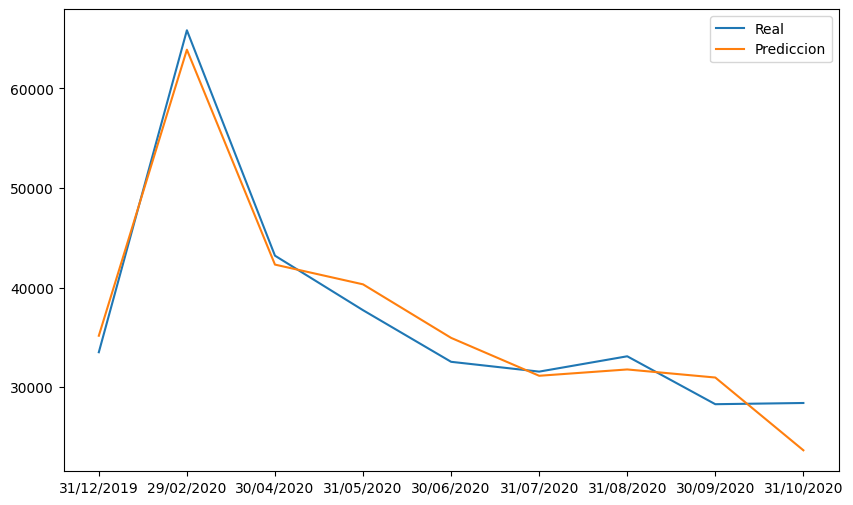

In [48]:
plt.figure(figsize = (10,6))

plt.plot(df_['Fecha'], df_['Y'], label="Real")
plt.plot(df_['Fecha'], df_['PRED'], label="Prediccion")
plt.legend()
plt.show()